# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

In [2]:
countries = pd.read_csv("countries.csv")

In [3]:
new_column_names = ["Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
                    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
                    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
                    "Industry", "Service"]
countries.columns = new_column_names
countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Ajustes iniciais

In [4]:
# Verificar tipos das colunas
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

### Converter string para float

In [5]:
# Função para transformar as variaveis strings em float
def convert_string_to_float(value):
    if isinstance(value, str): 
        return float(value.replace(',','.'))
    else:
        return value

In [6]:
# Criar copia do dataset
df = countries.copy()

In [7]:
# Colunas que precisam ser transformadas
cols_to_transform = ['Pop_density','Coastline_ratio', 'Net_migration',
                     'Infant_mortality','Literacy','Phones_per_1000',
                     'Arable','Crops','Other','Birthrate','Deathrate',
                     'Climate','Agriculture','Industry','Service']

In [8]:
# Transformação - String para float
for col in cols_to_transform:
    df[col] = df[col].apply(lambda x: convert_string_to_float(x))

In [9]:
# Verificar resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

### Remover espaços extras no inicio e final

In [10]:
# Colunas que precisam ser transformadas
cols_to_transform = ['Country','Region']

In [11]:
# Transformação - String para float
for col in cols_to_transform:
    df[col] = df[col].apply(lambda x: x.strip())

In [12]:
# Comparaçao
df['Country'][0]

'Afghanistan'

In [13]:
# Comparacao
countries['Country'][0]

'Afghanistan '

## Questão 1

Quais são as regiões (variável `Region`) presentes no data set? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [14]:
def q1():
    return sorted(df['Region'].unique())

In [15]:
# Resposta
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [16]:
def q2():
    # Criar copia de dataset para evitar transtornos ...
    data = df.copy()
    # Criar instancia para discretizar
    binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    # Aplicar transformação
    data['Pop_density_cat'] = binner.fit_transform(np.array(data['Pop_density']).reshape(-1, 1))
    # Pegar percentile
    p90_value = np.percentile(data['Pop_density_cat'], 90)
    # Pegar paises acima desse valor
    return int(data.loc[data['Pop_density_cat'] > p90_value, 'Country'].nunique())

In [17]:
# Resposta
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [20]:
def q3():
    # Considero uma solucao teorica
    return int(df['Region'].nunique() + len(df['Climate'].unique()))

In [23]:
# Resposta
q3()

18

One-Hot encoding seria responsável por **pegar os N valores únicos e transformar em N colunas binárias** (desconsiderando o leave one out). Note que NaN nessa questão é considerado também.

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [24]:
test_country = ['Test Country', 'NEAR EAST', -0.19032480757326514,-0.3232636124824411, -0.04421734470810142,
                -0.27528113360605316,0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
                0.6189182532646624, 1.0074863283776458, 0.20239896852403538,-0.043678728558593366,
                -0.13929748680369286, 1.3163604645710438,-0.3699637766938669, -0.6149300604558857,
                -0.854369594993175,0.263445277972641, 0.5712416961268142]

In [27]:
def q4():
    # Criar copia de dataset para evitar transtornos ...
    data = df.copy()
    # Define the columns to impute
    cols = data.columns[2:len(data.columns)]
    # Pipeline - Imputar
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    # Pipeline - Transformar as variaveis
    std = StandardScaler()
    data[cols] = std.fit_transform(data[cols])
    # Resolucao
    amostra = np.array(test_country[2:]).reshape(1,-1)
    # Return
    return float(std.transform(amostra)[0][9].round(3))

In [28]:
# Resposta
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [29]:
def q5():
    # Pegar os valores
    coluna = np.array(df['Net_migration'].dropna())
    # Calcular intervalos
    q1, q3 = np.quantile(coluna, [0.25, 0.75])
    itv_menor = q1 - 1.5*(q3-q1)
    itv_maior = q3 + 1.5*(q3-q1)
    # Verificar presenca de outliers
    outliers_abaixo = (coluna < itv_menor).sum()
    outilers_acima = (coluna > itv_maior).sum()
    # Retorno
    return (int(outliers_abaixo), int(outilers_acima), False)

In [30]:
# Resposta
q5()

(24, 26, False)

### Motivo do False

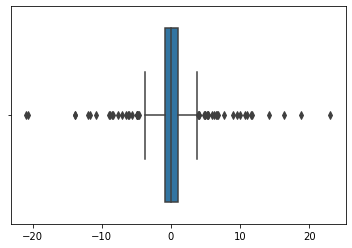

In [31]:
sns.boxplot(np.array(df['Net_migration'].dropna()));

Analisando o `boxplot`, é apresentado uma baixa variância para os dados que estão fora do padrão outlier, logo os outliers podem indicar tendências que podem ser relevante ao estudo.

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [26]:
# Necessário
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [27]:
def q6():
    # Define instancia
    countVec = CountVectorizer()
    # Aplica fit transform para adquirir as frequencias
    freqs = countVec.fit_transform(newsgroup.data)
    # Adquirir idx referente a nossa palavra
    idx = countVec.get_feature_names().index('phone')
    # Gerar resultado
    frequencia = freqs[:, idx].sum()
    # Retornar
    return int(frequencia)

In [28]:
# Resposta
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [29]:
def q7():
    # Definir instancia
    tfidfVec = TfidfVectorizer()
    # Aplicar fit transform nos dados
    results = tfidfVec.fit_transform(newsgroup.data)
    # Pegar index referente a nossa palavra
    idx = tfidfVec.get_feature_names().index('phone')
    # Gerar resultado
    tfidf_val = results[:, idx].sum()
    # Retornar
    return float(tfidf_val.round(3))

In [30]:
# Resposta
q7()

8.888